In [3]:
import setup

setup.main()
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

Working directory:  /Users/shivanimadhan/Desktop/code/neurometry/neurometry/neurometry
Directory added to path:  /Users/shivanimadhan/Desktop/code/neurometry/neurometry
Directory added to path:  /Users/shivanimadhan/Desktop/code/neurometry/neurometry/neurometry
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [4]:
import gph
import neurometry.curvature.viz as viz
import neurometry.curvature.persistent_homology as persistent_homology
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def synthetic_circle(num_points, noise_var):
    theta = 2 * np.pi * np.random.sample(num_points)
    x = np.cos(theta)
    y = np.sin(theta)

    circ = np.stack([x, y])
    circ_noise = np.stack([x, y])
    circ_noise += np.random.normal(0, noise_var, circ_noise.shape)

    return circ, circ_noise

In [6]:
circ, circ_noise = synthetic_circle(100, 0.05)
print("circ:", circ)
print("circ_noise:", circ_noise)

circ: [[-0.83107541 -0.97967856  0.3911236  -0.78264695 -0.55199776  0.30433987
   0.1085539  -0.83939365 -0.13080495  0.85933717  0.2301733   0.92520633
   0.73016334 -0.71671469 -0.40377413 -0.67814727  0.64031892  0.59941597
   0.58868323  0.86704195 -0.45125711  0.39424918 -0.3524454   0.96029524
   0.92318809  0.74163131 -0.68637137  0.97394135  0.77373626  0.99946691
  -0.78472973  0.97150754  0.66910111  0.02341686 -0.3728121   0.84283376
  -0.7803838   0.58635429 -0.71720827  0.99772754  0.69172109  0.88378458
   0.67906381 -0.50811143  0.87675946  0.01191074  0.76313168 -0.86473397
  -0.82049903 -0.96392288  0.50038502  0.9988186   0.7076198   0.64220884
   0.54083633  0.30217126  0.69678647  0.88527141 -0.95390924 -0.9987449
  -0.42096751 -0.75041616 -0.65750426 -0.93679651 -0.99788948  0.90347978
   0.99670888  0.77081506  0.98106858  0.17796938 -0.8273465   0.21828136
  -0.91242451  0.3350611   0.76812956  0.40552094  0.64857467  0.74886009
  -0.20181437 -0.97231787 -0.1228

In [7]:
circ.shape
circ_noise.shape

(2, 100)

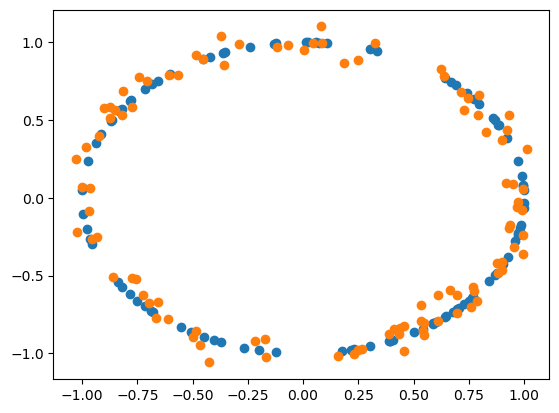

In [8]:
x = circ[0, :]
y = circ[1, :]

x_noise = circ_noise[0, :]
y_noise = circ_noise[1, :]

plt.scatter(x, y)
plt.scatter(x_noise, y_noise)

In [9]:
circ_trans = circ.T
circ_noise_trans = circ_noise.T

In [10]:
pers = gph.ripser_parallel(circ_trans, 2)
diagrams = pers["dgms"]

'compute_persistence_diagrams' executed in 0.0136s
'compute_persistence_diagrams' executed in 0.0098s


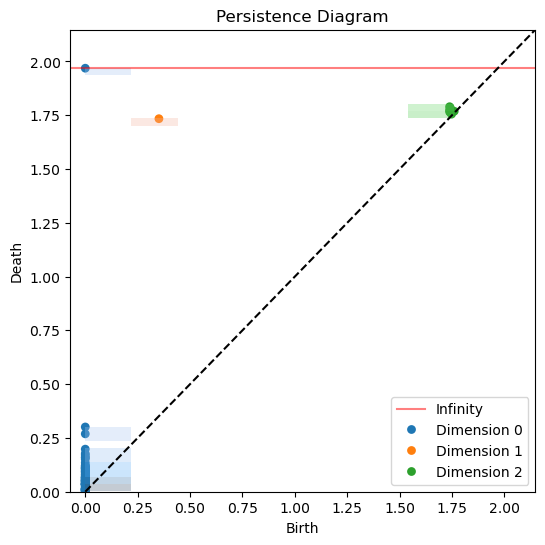

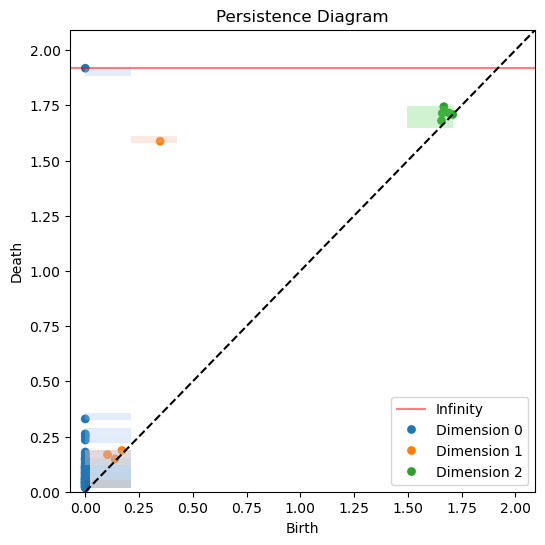

In [11]:
diagrams = persistent_homology.compute_persistence_diagrams(
    circ_trans, maxdim=2, n_threads=-1
)
diagrams_noise = persistent_homology.compute_persistence_diagrams(
    circ_noise_trans, maxdim=2, n_threads=-1
)

viz.plot_persistence_diagrams(diagrams, density=True)
viz.plot_persistence_diagrams(diagrams_noise, density=True)